### Project 2
Jiachen Gong


#### Lecture 4
#### Question 1

Compare the convergence rates of the four methods below by doing the following:
Use the Binomial Method to price a 6-month American Put option with the following information: the 
risk-free interest rate is 5.5% per annum; the volatility is 25% per annum; the current stock price is $180;
and the strike price is $170. Divide the time interval into 𝑛 parts to estimate the price of this option. Use 
𝑛 = 20, 40, 80, 100, 200, 500, to estimate the price and draw all resulting prices in one graph, where the 
horizontal axis measures 𝑛, and the vertical one the price of the option.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.special import laguerre, hermite
from scipy.linalg import lstsq
from scipy.linalg import solve

d:\Applications\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
r = 0.055
sigma = 0.25
S_0 = 180
K = 180
T = 0.5
n_list = [20,40,80,100,200,500]

def binomial_a(r,sigma,S_0,K,T,n):
    # calculate delta
    dt = T/n
    # step 1, calculate the tree for S_0
    # init the S tree and fill S_0
    S_Tree = np.zeros((n+1,n+1))
    S_Tree[0,0] = S_0
    # calculate u and d and p
    c = 0.5*(np.exp(-r*dt)+np.exp((r+sigma**2)*dt))
    d = c-np.sqrt(c**2-1)
    u = 1/d
    p = (np.exp(r*dt)-d)/(u-d)
    # fill the S tree
    for i in range(1,n+1):
        # the upper most path where there is only u
        S_Tree[0,i] = S_Tree[0,i-1]*u
        for j in range(1,i+1):
            # for each node at same dt(index i in this case)
            # the value of the node is d*value of the upper left node
            S_Tree[j,i] = S_Tree[j-1,i-1]*d
    # calculate the price of the EU option ar the right most col
    Put_Tree = np.zeros((n+1,n+1))
    Put_Tree[:,n] = np.maximum(K-S_Tree[:,n],0)
    # apply backward induction
    for i in range(n-1,-1,-1):
        # for col i there is  i nodes
        for j in range(i+1):
            # exercise value
            EV = np.maximum(K-S_Tree[j,i],0)
            # hold value
            CV = np.exp(-r*dt)*(p*Put_Tree[j,i+1]+(1-p)*Put_Tree[j+1,i+1])
            Put_Tree[j,i] = np.maximum(EV,CV)
    return Put_Tree[0,0]

def binomial_b(r,sigma,S_0,K,T,n):
    # calculate delta
    dt = T/n
    # step 1, calculate the tree for S_0
    # init the S tree and fill S_0
    S_Tree = np.zeros((n+1,n+1))
    S_Tree[0,0] = S_0
    # calculate u and d and p
    d = np.exp((r-(sigma**2)/2)*dt-sigma*np.sqrt(dt))
    u = np.exp((r-(sigma**2)/2)*dt+sigma*np.sqrt(dt))
    p = 0.5
    # fill the S tree
    for i in range(1,n+1):
        # the upper most path where there is only u
        S_Tree[0,i] = S_Tree[0,i-1]*u
        for j in range(1,i+1):
            # for each node at same dt(index i in this case)
            # the value of the node is d*value of the upper left node
            S_Tree[j,i] = S_Tree[j-1,i-1]*d
    # calculate the price of the EU option ar the right most col
    Put_Tree = np.zeros((n+1,n+1))
    Put_Tree[:,n] = np.maximum(K-S_Tree[:,n],0)
    # apply backward induction
    for i in range(n-1,-1,-1):
        # for col i there is  i nodes
        for j in range(i+1):
            # exercise value
            EV = np.maximum(K-S_Tree[j,i],0)
            # hold value
            CV = np.exp(-r*dt)*(p*Put_Tree[j,i+1]+(1-p)*Put_Tree[j+1,i+1])
            Put_Tree[j,i] = np.maximum(EV,CV)
    return Put_Tree[0,0]


P_a_list = []
P_b_list = []

for n in n_list:
    P_a_list.append(binomial_a(r,sigma,S_0,K,T,n))
    P_b_list.append(binomial_b(r,sigma,S_0,K,T,n))

        

        

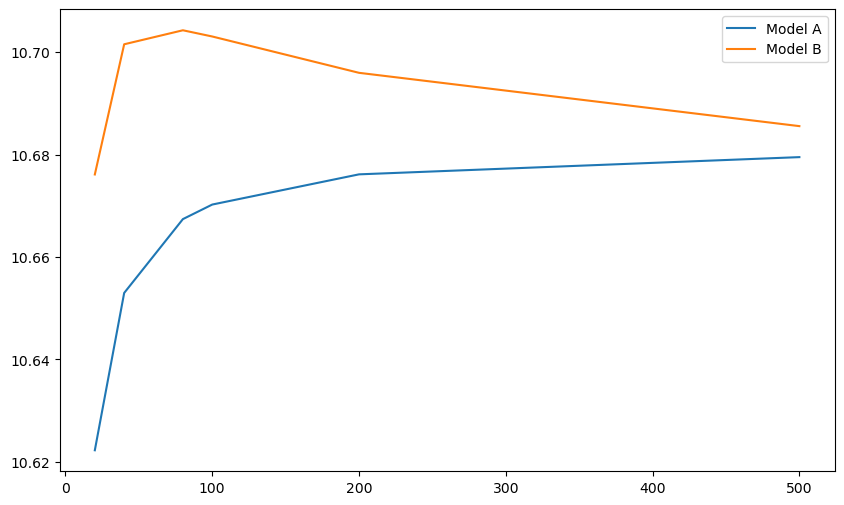

In [3]:
plt.figure(figsize = (10,6))
plt.plot(n_list,P_a_list,label = ("Model A"))
plt.plot(n_list,P_b_list,label = ("Model B"))

plt.legend()
plt.show()


#### Question 2

Consider the following information on the stock of a company and American put options on it: 
 𝑆0 =$180, 𝑋 =$170, 𝑟=0.055, 𝜎 =0.25, 𝑇 =6 months, 𝜇 =0.15. 
Using the CRR Binomial tree method, estimate the following and draw their graphs: 

In [4]:
def binomial_CRR(r,sigma,S_0,K,T,n):
    # calculate delta
    dt = T/n
    # step 1, calculate the tree for S_0
    # init the S tree and fill S_0
    S_Tree = np.zeros((n+1,n+1))
    S_Tree[0,0] = S_0
    # calculate u and d and p
    d = np.exp(-sigma*np.sqrt(dt))
    u = np.exp(sigma*np.sqrt(dt))
    p = (np.exp(r*dt)-d)/(u-d)
    # fill the S tree
    for i in range(1,n+1):
        # the upper most path where there is only u
        S_Tree[0,i] = S_Tree[0,i-1]*u
        for j in range(1,i+1):
            # for each node at same dt(index i in this case)
            # the value of the node is d*value of the upper left node
            S_Tree[j,i] = S_Tree[j-1,i-1]*d
    # calculate the price of the EU option ar the right most col
    Put_Tree = np.zeros((n+1,n+1))
    Put_Tree[:,n] = np.maximum(K-S_Tree[:,n],0)
    # apply backward induction
    for i in range(n-1,-1,-1):
        # for col i there is  i nodes
        for j in range(i+1):
            # exercise value
            EV = np.maximum(K-S_Tree[j,i],0)
            # hold value
            CV = np.exp(-r*dt)*(p*Put_Tree[j,i+1]+(1-p)*Put_Tree[j+1,i+1])
            Put_Tree[j,i] = np.maximum(EV,CV)
    return Put_Tree[0,0]

def Delta_S(r,sigma,S_0,K,T,n):
    Delta_S_list = []
    S_0_list = np.arange(170,191,2)
    for S_i in S_0_list:
        d_price = binomial_CRR(r,sigma,S_i+1,K,T,n)-binomial_CRR(r,sigma,S_i,K,T,n)
        Delta_S_list.append(d_price)
    return Delta_S_list,S_0_list

def Delta_T(r,sigma,S_0,K,T,n):
    Delta_T_list = []
    T_0_list = np.arange(0.003,0.181,0.003)
    for T_i in T_0_list:
        d_price = binomial_CRR(r,sigma,S_0+1,K,T_i,n)-binomial_CRR(r,sigma,S_0,K,T_i,n)
        Delta_T_list.append(d_price)
    return Delta_T_list,T_0_list

def Theta_T(r,sigma,S_0,K,T,n):
    T_list = []
    T_0_list = np.arange(0.003,0.181,0.003)
    for T_i in T_0_list:
        d_price = binomial_CRR(r,sigma,S_0,K,T_i+0.001,n)-binomial_CRR(r,sigma,S_0,K,T_i,n)
        T_list.append(d_price*1000)
    return T_list,T_0_list

def Vega_S(r,sigma,S_0,K,T,n):
    Vega_S_list = []
    S_0_list = np.arange(170,191,2)
    for S_i in S_0_list:
        d_price = binomial_CRR(r,sigma+0.01,S_i,K,T,n)-binomial_CRR(r,sigma,S_i,K,T,n)
        Vega_S_list.append(d_price*100)
    return Vega_S_list,S_0_list


In [5]:
r = 0.055
sigma = 0.25
S_0 = 180
K = 180
T = 0.5
n = 100

D_S,X_D_S = Delta_S(r,sigma,S_0,K,T,n)
D_T,X_D_T = Delta_T(r,sigma,S_0,K,T,n)
T_T,X_T_T = Theta_T(r,sigma,S_0,K,T,n)
V_S,X_V_S = Vega_S(r,sigma,S_0,K,T,n)




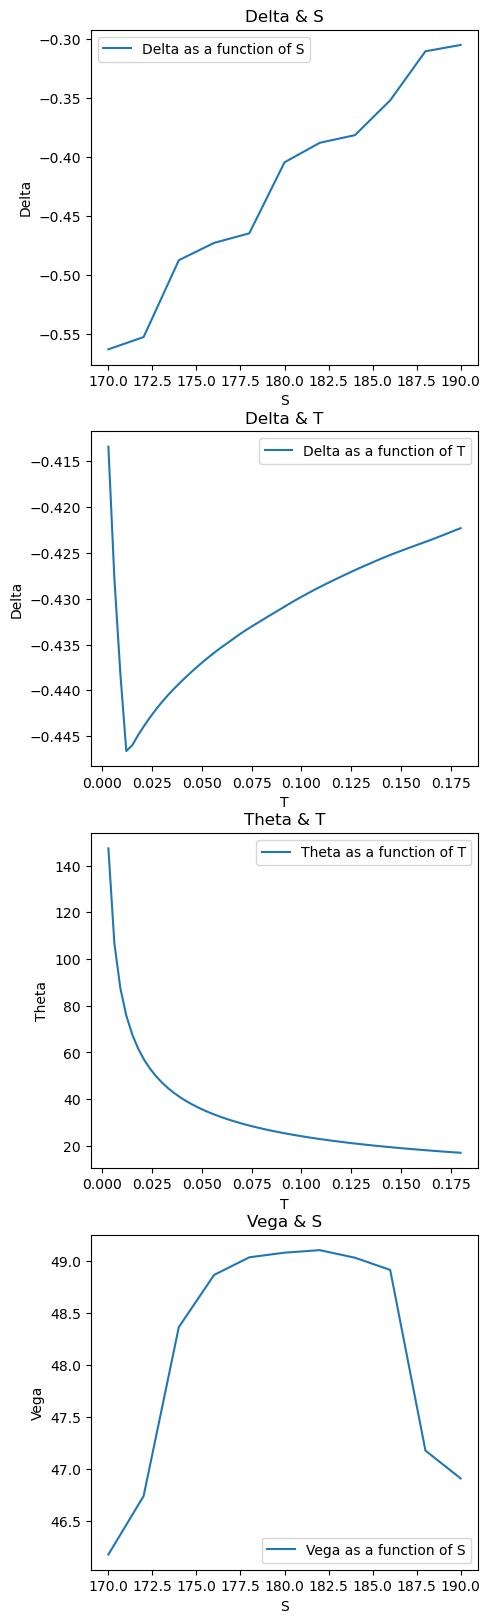

In [6]:

plt.figure(figsize = (5,20))
plt.subplot(4,1,1)
plt.plot(X_D_S,D_S,label = ("Delta as a function of S"))
plt.xlabel("S")
plt.ylabel("Delta")
plt.title("Delta & S")
plt.legend()
plt.subplot(4,1,2)
plt.plot(X_D_T,D_T,label = ("Delta as a function of T"))
plt.xlabel("T")
plt.ylabel("Delta")
plt.title("Delta & T")
plt.legend()
plt.subplot(4,1,3)
plt.plot(X_T_T,T_T,label = ("Theta as a function of T"))
plt.xlabel("T")
plt.ylabel("Theta")
plt.title("Theta & T")
plt.legend()
plt.subplot(4,1,4)
plt.plot(X_V_S,V_S,label = ("Vega as a function of S"))
plt.xlabel("S")
plt.ylabel("Vega")
plt.title("Vega & S")
plt.legend()
plt.show()

#### Question 3

In [7]:
r = 0.055
sigma = 0.25
S_0 = 180
K = 180
T = 0.5

def trinomial_a(r,sigma,S_0,K,T,n):
    # calculate delta
    dt = T/n
    # step 1, calculate the tree for S_0
    # init the S tree and fill S_0
    S_Tree = np.zeros((2*n+1,n+1))
    S_Tree[0,0] = S_0
    # calculate u and d and p
    d = np.exp(-sigma*np.sqrt(3*dt))
    u = 1/d
    p_d = (r*dt*(1-u)+(r*dt)**2+((sigma**2)*dt))/((u-d)*(1-d))
    p_u = (r*dt*(1-d)+(r*dt)**2+((sigma**2)*dt))/((u-d)*(u-1))
    p_m = 1-p_u-p_d
    # fill the S tree
    # i - col j - row
    for i in range(1,n+1):
        # the upper most path where there is only u
        S_Tree[0,i] = S_Tree[0,i-1]*u
        # fill 2 nodes at a time so step = 2
        for j in range(1,2*i+1,2):
            # for each node at same dt (index i in this case)
            # for j node S is the same
            S_Tree[j,i] = S_Tree[j-1,i-1]
            # for j+1 node S is S*d
            S_Tree[j+1,i] = S_Tree[j,i]*d
    # calculate the price of the EU option ar the right most col
    Put_Tree = np.zeros((2*n+1,n+1))
    Put_Tree[:,n] = np.maximum(K-S_Tree[:,n],0)
    # apply backward induction
    for i in range(n-1,-1,-1):
        # for col i there is  i nodes
        for j in range(2*i+1):
            # exercise value
            EV = np.maximum(K-S_Tree[j,i],0)
            # hold value
            CV = np.exp(-r*dt)*(p_u*Put_Tree[j,i+1]+p_m*Put_Tree[j+1,i+1]+p_d*Put_Tree[j+2,i+1])
            Put_Tree[j,i] = np.maximum(EV,CV)
    return Put_Tree[0,0]

def trinomial_b(r,sigma,S_0,K,T,n):
    # calculate delta
    dt = T/n
    # step 1, calculate the tree for S_0
    # init the S tree and fill S_0
    S_Tree = np.zeros((2*n+1,n+1))
    S_Tree[0,0] = np.log(S_0)
    # calculate u and d and p
    d = -sigma*np.sqrt(2*dt)
    u = -d
    p_d = 0.5*(((sigma**2)*dt+(r-0.5*(sigma**2))*(dt**2))/(u**2)-((r-0.5*sigma**2)*dt)/(u))
    p_u = 0.5*(((sigma**2)*dt+(r-0.5*(sigma**2))*(dt**2))/(u**2)+((r-0.5*sigma**2)*dt)/(u))
    
    p_m = 1-p_u-p_d
    # fill the S tree
    for i in range(1,n+1):
        # the upper most path where there is only u
        S_Tree[0,i] = S_Tree[0,i-1]+u
        for j in range(1,2*i+1,2):
            # for each node at same dt(index i in this case)
            # the value of the node is d*value of the upper left node
            S_Tree[j,i] = S_Tree[j-1,i-1]
            S_Tree[j+1,i] = S_Tree[j,i]+d
    # calculate the price of the EU option ar the right most col
    S_Tree = np.exp(S_Tree)
    Put_Tree = np.zeros((2*n+1,n+1))
    Put_Tree[:,n] = np.maximum(K-S_Tree[:,n],0)
    # apply backward induction
    for i in range(n-1,-1,-1):
        # for col i there is  i nodes
        for j in range(2*i+1):
            # exercise value
            EV = np.maximum(K-S_Tree[j,i],0)
            # hold value
            CV = np.exp(-r*dt)*(p_u*Put_Tree[j,i+1]+p_m*Put_Tree[j+1,i+1]+p_d*Put_Tree[j+2,i+1])
            Put_Tree[j,i] = np.maximum(EV,CV)
    return Put_Tree[0,0]


In [8]:
P_a_list = []
P_b_list = []
n_list = [20,40,70,80,100,200]
for n in n_list:
    P_a_list.append(trinomial_a(r,sigma,S_0,K,T,n))
    P_b_list.append(trinomial_b(r,sigma,S_0,K,T,n))

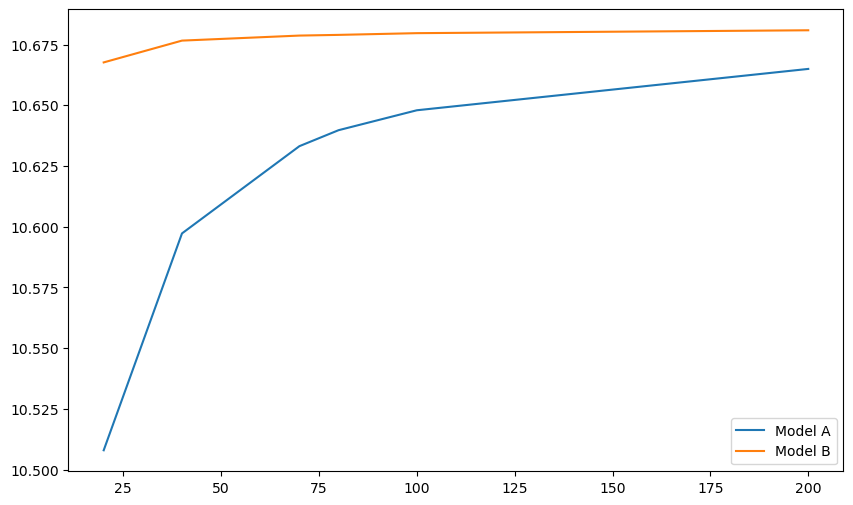

In [9]:
plt.figure(figsize = (10,6))
plt.plot(n_list,P_a_list,label = ("Model A"))
plt.plot(n_list,P_b_list,label = ("Model B"))

plt.legend()
plt.show()

#### Lecture 5

#### Question 4 

Consider the following information on the stock of company XYZ: The current stock price is $180, and 
the volatility of the stock price is 𝜎 =25% per annum. Assume the prevailing risk-free rate is 𝑟 =5.5% 
per annum. Use the following method to price the specified option:

In [10]:
def regression_func(x,coefficients,poly_type):
    if poly_type == 'laguerre':
        return sum(c * laguerre(i)(x) for i, c in enumerate(coefficients))
    elif poly_type == 'hermite':
        
        # cnt = 1
        # sum_i = 0
        # for a in coefficients:
        #     # print(a)
        #     sum_i+=a*hermite(cnt-1)(x)
        #     cnt+=1
        # return sum_i
        return sum(c * hermite(i)(x) for i, c in enumerate(coefficients))    
    elif poly_type == 'monomials':
        return sum(c * x**i for i, c in enumerate(coefficients))

def polynomial_regression(k, x, y, poly_type):
    # construct Xs
    if poly_type == 'laguerre':
        X = np.column_stack([laguerre(i)(x) for i in range(k + 1)])
    elif poly_type == 'hermite':
        # A= np.zeros((k,k))
        # for i in range(k):
        #     for j in range(k):
        #         A[i, j] = sum((hermite(i)(x_i)*hermite(j)(x_i)) for x_i in x)
        # B = np.zeros(k)
        # for j in range(k):
        #     B[j] = sum((y[m]*hermite(j)(x[m])) for m in range(0,len(x)))
        # coefficients =  np.dot(np.linalg.inv(A),B)
        # y_pred = regression_func(x,coefficients,poly_type)
        # return y_pred
        X = np.column_stack([hermite(i)(x) for i in range(k + 1)])
    else:
        X = np.column_stack([x**i for i in range(k + 1)])
        
    # do linear regression
    # the matrix should be full col rank
    # XTX = np.dot(X.T,X)
    # XTy = np.dot(X.T,y)
    # coefficients = np.linalg.solve(XTX, XTy)

    # Perform least squares regression
    coefficients, _, _, _ = lstsq(X, y)
    
    # Generate predicted values
    y_pred = regression_func(x,coefficients,poly_type)
    return y_pred

In [11]:

def LSMC(r,sigma,S_0,K,T,N,K_P,poly_type):
    # calculate time step
    dt = 1/np.sqrt(N)
    step = int(T/dt)
    x_size = step+1
    y_size = N 
    # df for stock price
    S_Mat = np.zeros((y_size,x_size))
    # print(S_Mat.shape)
    # fill the first col
    S_Mat[:,0] = S_0
    # fill the matrix with stock price
    # use antithetic value 
    # fill 2 path one time
    # fill the upper and lower part seperately
    mid = int(N/2)
    for col in range(1,step+1):
        # antithetic
        Z = np.random.normal(loc=0, scale=1,size = mid)
        Z_comb = np.concatenate((Z,-Z))
        # print(Z_comb.shape)
        # print(S_Mat[:,col].shape)
        S_Mat[:,col] = S_Mat[:,col-1] + S_Mat[:,col-1]*r*dt + S_Mat[:,col-1]*sigma*np.sqrt(dt)*Z_comb
        # S_Mat[:,col] = S_Mat[:col-1]*(1+r*dt+sigma*np.sqrt(dt)*Z_comb)
    
    # now init the df for option price
    P_Mat = np.zeros((y_size,x_size))
    # df for index
    isExercise_Mat = np.zeros((y_size,x_size))
    # last col of P_Mat is the exercise value 
    P_Mat[:,x_size-1]=np.maximum(K-S_Mat[:,x_size-1],0)
    # find where there is exercise 
    isExercise_i = np.where(P_Mat[:,x_size-1]==0,0,1)
    #update the sutuation to exercise matrix
    isExercise_Mat[:,x_size-1] = isExercise_i
    # now move backward
    for col in range(x_size-2,0,-1):
        
        # exercise value
        EV = np.maximum(K-S_Mat[:,col],0)
        
        # holding value 
        # X 
        X = S_Mat[:,col]
        # index of ITM 
        index = np.argwhere(K-X>0).reshape(-1)
        # create mask
        mask = np.zeros(y_size,dtype=bool)
        mask[index] = True
        # only keep ITM
        X = X[mask]
        # Y, also keep ITM
        Y_raw = P_Mat[:,col+1:]
        Y_raw = Y_raw[mask]
        # generate discounnt factor and times it to Y
        for col_Y in range(Y_raw.shape[1]):
            discount = np.exp(-r*dt*(col_Y+1))
            Y_raw[:,col_Y] = Y_raw[:,col_Y]*discount
        # calculate index*Y
        index_i = isExercise_Mat[:,col+1:]
        index_i = index_i[mask]
        Y = np.array([np.dot(Y_raw[i], index_i[i].T) for i in range(Y_raw.shape[0])])
        # now we get X,Y, we can do polynomial regression
        # now we get the continue value
        CV_raw = (polynomial_regression(K_P,X,Y,poly_type))
        # print(CV_raw)
        # fill back CV 
        CV = np.zeros(y_size).reshape(-1)
        # print(index.shape)
        CV[index] = CV_raw
        
        # calculate new option price
        P = np.maximum(EV,CV)
        # position where there is exercise
        index_change = np.argwhere(EV>CV)
        # update isExercise
        isExercise_Mat[index_change,:] = 0
        isExercise_Mat[index_change,col] = 1
        
        # update P_Mat
        P_Mat[index_change,:] = 0
        P_Mat[index_change,col] = EV[index_change]
        
    
    # calculate price
    P0 = np.sum(P_Mat)/N
    return P0


#### (a)


In [18]:
r = 0.055
sigma = 0.25
S_0 = 180
K = 180
N = 100000

print("Laguerre")
T_list = [0.5,1.5]
k_list = [2,3,4,5]
result = pd.DataFrame()
for T_i in T_list:
    for k_i in k_list:

        P = LSMC(r,sigma,S_0,K,T_i,N,k_i,'Laguerre')
        T_label = f"T = {T_i}"
        k_label = f"k = {k_i}"
        result.loc[T_label,k_label] = P

result
        

Laguerre


,k = 2,k = 3,k = 4,k = 5
T = 0.5,10.461712,10.486918,10.483265,10.496036
T = 1.5,15.894116,15.768847,15.863753,15.765426


Comments
 - For laguerre polynomial, the result is very close to the binomial method. 
 - Specifically, for T = 0.5, the bonimial gives 10.67 and laguerre gives 10.48 at k = 3, which proves that the optimal k is 3
 - The calculation of laguerre is slower potentially it uses lots of exponentials 
 

#### (b)

In [19]:
print("hermite")
T_list = [0.5,1.5]
k_list = [2,3,4,5]
result = pd.DataFrame()
for T_i in T_list:
    for k_i in k_list:

        P = LSMC(r,sigma,S_0,K,T_i,N,k_i,'hermite')
        T_label = f"T = {T_i}"
        k_label = f"k = {k_i}"
        result.loc[T_label,k_label] = P

result

hermite


,k = 2,k = 3,k = 4,k = 5
T = 0.5,10.808655,10.847924,10.845125,10.884980
T = 1.5,16.937897,17.054352,17.021593,17.023535


Comments
 - For hermite polynomial, the result is not as good as laguerre, The value seems to be over estimate. 
 - Specifically, for T = 0.5, the bonimial gives 10.67 and hermite gives 10.84 at k = 3.
 - However, hermite is faster than laguerre

#### (c)

In [13]:
r = 0.055
sigma = 0.25
S_0 = 180
K = 180
N = 100000

print("monomials")
T_list = [0.5,1.5]
k_list = [2,3,4,5]
result = pd.DataFrame()
for T_i in T_list:
    for k_i in k_list:

        P = LSMC(r,sigma,S_0,K,T_i,N,k_i,'monomials')
        T_label = f"T = {T_i}"
        k_label = f"k = {k_i}"
        result.loc[T_label,k_label] = P

result

monomials


,k = 2,k = 3,k = 4,k = 5
T = 0.5,10.816029,10.902422,10.866677,10.865476
T = 1.5,16.881958,17.060025,17.051078,17.012606


Comments
 - For simple monomials polynomial, the result is very close to the hermite method, which is relatively close yet systematically be higher than binomial method. 
 - Specifically, for T = 0.5, the bonimial gives 10.67 and laguerre gives 10.90 at k = 3
 - the calculation speed is fast, close to hermite
 

#### Lecture 6
#### Question 5

In [25]:

def get_p(r,sigma,dx,dt,type):
    v = r-(sigma**2)/2
    if type == 'EFDM':
        p_u = dt*(((sigma**2)/(2*dx**2))+((v)/(2*dx)))
        p_m = 1-dt*((sigma**2)/(dx**2))-r*dt
        p_d = dt*(((sigma**2)/(2*dx**2))-((v)/(2*dx)))
    elif type == 'IFDM':
        p_u = -0.5*dt*(((sigma**2)/(dx**2))+(v/dx))
        p_m = 1+dt*(sigma**2)/(dx**2)+r*dt 
        p_d = -0.5*dt*(((sigma**2)/(dx**2))-(v/dx))
    else:
        p_u = -0.25*dt*(((sigma**2)/(dx**2))+(v/dx))
        p_m = 1+dt*(sigma**2)/(2*dx**2)+r*dt/2 
        p_d = -0.25*dt*(((sigma**2)/(dx**2))-(v/dx))
        
    return p_u,p_m,p_d
        
    

def FDM_logBS(r,sigma,S_min,S_max,dx,K,T,dt,type):
    # parameters
    # M is on x axis
    M = int(T/dt)
    X_max = np.log(S_max)
    X_min = np.log(S_min)
    # N is on y axis
    N = int((X_max-X_min)/dx)
    
    # array for stoc price
    # it is the same for each time step
    X_grid= np.linspace(X_min,X_max,N+1)
    S_grid = np.exp(X_grid)
    
    # boundary condition
    P_grid = np.maximum(K-S_grid,0)
    #print(P_grid)
    # calculate ps
    
    p_u,p_m,p_d = get_p(r,sigma,dx,dt,type)
    
    # update from back
    for i in range(M):
        
        # B
        B = np.zeros(N+1)
        # fill max value
        B[N] = 0
        # fill min value
        B[0] = -S_grid[0]+S_grid[1]
        # up to now B is trady for explicit
        
        # A
        A = np.zeros((N+1,N+1))
        for i in range(N+1):
            if i > 0:
                A[i, i-1] = p_u
            A[i, i] = p_m
            if i < N:
                A[i, i+1] = p_d
        # explicit
        if type =='EFDM':
            # F_i+1
            F_1 = P_grid
            # Fill in the tridiagonal values
            # Modify A
            A[0,0] = p_u
            A[N,N-2] = p_u
            A[0,1] = p_m
            A[N,N-1] = p_m
            A[0,2] = p_d
            A[N,N] = p_d
            F_1 = A@F_1+B
            EV = np.maximum(K-S_grid,0)
            P_grid = np.maximum(F_1,EV)
            # print(P_grid)
            
        # implicit
        elif type =='IFDM':
            # fill with p_grid values
            B[1:N] = P_grid[1:N]
            # print("B")
            # print(B)
            # print("P")
            # print(P_grid)
            # Modify A
            A[0,0] = 1
            A[0,1] = -1
            A[N-1,N-1] = -1
            A[N-1,N-2] = 1
        
            F_1 = solve(A,B)
            EV = np.maximum(K-S_grid,0)
            P_grid = np.maximum(F_1,EV)
           
        #C_N
        else:
            # fill value in between
            for j in range(1,N):
                B[j] = -p_u*P_grid[j+1]-(p_m-2)*P_grid[j]-p_d*P_grid[j-1]
                
            # Modify A
            A[0,0] = 1
            A[0,1] = -1
            A[N-1,N-1] = -1
            A[N-1,N-2] = 1
            
            F_1 = solve(A,B)
            EV = np.maximum(K-S_grid,0)
            P_grid = np.maximum(F_1,EV)
        
    return S_grid,P_grid


In [26]:
sigma = 0.25  
r = 0.055
K = 180   
S_max = 190   
S_min = 170   
T = 0.5     
dt = 0.002
dx_list = [None]*3

const_list = [1,3,4]
for i in range(3):
    dx_list[i] = sigma*np.sqrt(const_list[i]*dt)
method_list = ['EFDM','IFDM','CNFDM']

result_list = []

for dx in dx_list:
    result_i = pd.DataFrame()
    for method in method_list:
        S_grid,P_grid= FDM_logBS(r,sigma,S_min,S_max,dx,K,T,dt,method)
        for i in range(len(S_grid)):
            col_label = f'S = {np.round(S_grid[i],2)}'
            result_i.loc[method,col_label] = np.round(P_grid[i],4)
        
        # use binomial as benchmark
        col_list = result_i.columns
        for i in range(len(S_grid)):
            
            S_i = S_grid[i]
            P_benchmark = binomial_b(r,sigma,S_i,K,T,100)
            result_i.loc['Binomial_B',col_list[i]] = np.round(P_benchmark,4)
    result_list.append(result_i)

#### Case 1
 𝛥𝑋 = 𝜎√𝛥𝑡

In [27]:
result_list[0]

,S = 170.0,S = 172.11,S = 174.25,S = 176.42,S = 178.61,S = 180.84,S = 183.08,S = 185.36,S = 187.67,S = 190.0
EFDM,42.7493,40.6353,38.7788,37.1816,35.8455,34.7724,33.9644,33.4236,33.1521,33.1521
Binomial_B,15.7068,14.4990,13.4049,12.3252,11.2875,10.3553,9.4326,8.5700,7.7956,7.0270
IFDM,19.1065,16.9925,14.8689,12.7347,10.5880,8.4220,6.2012,3.7234,0.0000,0.0000
CNFDM,18.6088,16.4948,14.3887,12.2899,10.1975,8.1107,6.0286,3.9499,1.8735,0.3136


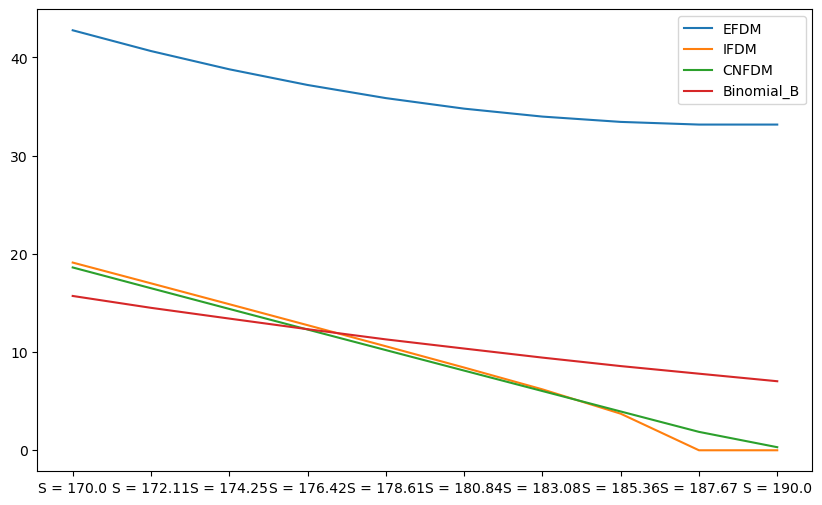

In [28]:
result_i = result_list[0]
plt.figure(figsize = (10,6))
for method in method_list:
    plt.plot(result_i.columns,result_i.loc[method,:],label = method)
plt.plot(result_i.columns,result_i.loc['Binomial_B',:],label = 'Binomial_B')
plt.legend()

Comments
 - EFDM's estimation is very high. as EFDM is not guaranteed to be stable.
 - IFDM and CNFDM results are very close, However the value of IFDM at S = 187.67 seems to be a little strange
 - the benchmark is the binomial method B 

#### Case 2
 𝛥𝑋 = 𝜎√3𝛥𝑡

In [29]:
result_list[1]

,S = 170.0,S = 173.82,S = 177.73,S = 181.73,S = 185.82,S = 190.0
EFDM,49.7186,45.8945,43.0077,41.0701,40.0945,40.0945
Binomial_B,15.7068,13.6221,11.6793,9.9857,8.4138,7.0270
IFDM,19.2287,15.4046,11.5211,7.3420,0.0000,0.0000
CNFDM,18.9574,15.1333,11.3252,7.5299,3.7433,0.2693


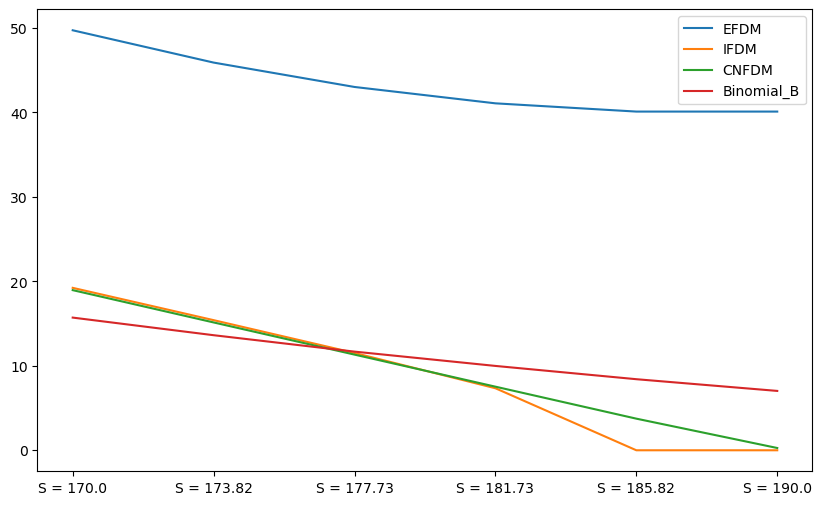

In [30]:
result_i = result_list[1]
plt.figure(figsize = (10,6))
for method in method_list:
    plt.plot(result_i.columns,result_i.loc[method,:],label = method)
plt.plot(result_i.columns,result_i.loc['Binomial_B',:],label = 'Binomial_B')
plt.legend()

Comments
 - EFDM's estimation is very high. as EFDM is not guaranteed to be stable.
 - IFDM and CNFDM results are very close, However the value of IFDM at S = 185.62 seems to be strange as it is close to 0 
 - the benchmark is the binomial method B 

#### Case 3
 𝛥𝑋 = 𝜎√4𝛥𝑡

In [31]:
result_list[2]

,S = 170.0,S = 174.79,S = 179.72,S = 184.79,S = 190.0
EFDM,59.7825,54.9891,51.7687,50.1456,50.1456
Binomial_B,15.7068,13.1340,10.8194,8.7664,7.0270
IFDM,19.2297,14.4363,9.3105,0.0000,0.0000
CNFDM,19.0801,14.2867,9.5079,4.7391,0.2655


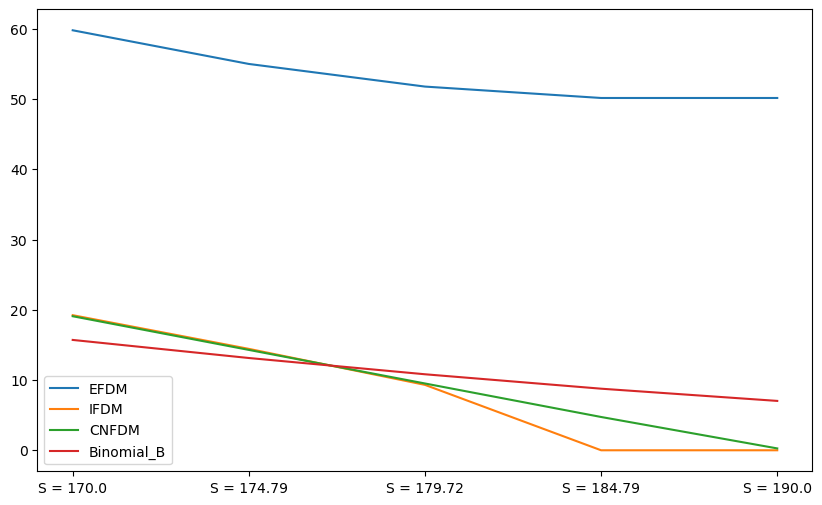

In [32]:
result_i = result_list[2]
plt.figure(figsize = (10,6))
for method in method_list:
    plt.plot(result_i.columns,result_i.loc[method,:],label = method)
plt.plot(result_i.columns,result_i.loc['Binomial_B',:],label = 'Binomial_B')
plt.legend()

Comments
 - EFDM's estimation is very high. as EFDM is not guaranteed to be stable.
 - IFDM and CNFDM results are very close, However the value of IFDM at S = 185.62 seems to be strange as it is close to 0 
 - the benchmark is the binomial method B 

#### Question 6

Trial 1 - modify the function of Q5

In [2]:
def get_p(r,sigma,dx,dt,type):
    v = r-(sigma**2)/2
    if type == 'EFDM':
        p_u = dt*(((sigma**2)/(2*dx**2))+((v)/(2*dx)))
        p_m = 1-dt*((sigma**2)/(dx**2))-r*dt
        p_d = dt*(((sigma**2)/(2*dx**2))-((v)/(2*dx)))
    elif type == 'IFDM':
        p_u = -0.5*dt*(((sigma**2)/(dx**2))+(v/dx))
        p_m = 1+dt*(sigma**2)/(dx**2)+r*dt 
        p_d = -0.5*dt*(((sigma**2)/(dx**2))-(v/dx))
    else:
        p_u = -0.25*dt*(((sigma**2)/(dx**2))+(v/dx))
        p_m = 1+dt*(sigma**2)/(2*dx**2)+r*dt/2 
        p_d = -0.25*dt*(((sigma**2)/(dx**2))-(v/dx))
        
    return p_u,p_m,p_d
        
    

def FDM_BS(r,sigma,S_min,S_max,dS,K,T,dt,type):
    dx = np.log(dS)
    # parameters
    # M is on x axis
    M = int(T/dt)

    # N is on y axis
    N = int((S_max-S_min)/dS)
    
    # array for stoc price
    # it is the same for each time step
    S_grid= np.linspace(S_min,S_max,N+1)
    
    # boundary condition
    P_grid = np.maximum(K-S_grid,0)
    #print(P_grid)
    # calculate ps
    
    p_u,p_m,p_d = get_p(r,sigma,dx,dt,type)
    
    # update from back
    for i in range(M):
        
        # B
        B = np.zeros(N+1)
        # fill max value
        B[N] = 0
        # fill min value
        B[0] = -S_grid[0]+S_grid[1]
        # up to now B is trady for explicit
        
        # A
        A = np.zeros((N+1,N+1))
        for i in range(N+1):
            if i > 0:
                A[i, i-1] = p_u
            A[i, i] = p_m
            if i < N:
                A[i, i+1] = p_d
        # explicit
        if type =='EFDM':
            # F_i+1
            F_1 = P_grid
            # Fill in the tridiagonal values
            # Modify A
            A[0,0] = p_u
            A[N,N-2] = p_u
            A[0,1] = p_m
            A[N,N-1] = p_m
            A[0,2] = p_d
            A[N,N] = p_d
            F_1 = A@F_1+B
            EV = np.maximum(K-S_grid,0)
            P_grid = np.maximum(F_1,EV)
            # print(P_grid)
            
        # implicit
        elif type =='IFDM':
            # fill with p_grid values
            B[1:N] = P_grid[1:N]
            # print("B")
            # print(B)
            # print("P")
            # print(P_grid)
            # Modify A
            A[0,0] = 1
            A[0,1] = -1
            A[N-1,N-1] = -1
            A[N-1,N-2] = 1
        
            F_1 = solve(A,B)
            EV = np.maximum(K-S_grid,0)
            P_grid = np.maximum(F_1,EV)
           
        #C_N
        else:
            # fill value in between
            for j in range(1,N):
                B[j] = -p_u*P_grid[j+1]-(p_m-2)*P_grid[j]-p_d*P_grid[j-1]
                
            # Modify A
            A[0,0] = 1
            A[0,1] = -1
            A[N-1,N-1] = -1
            A[N-1,N-2] = 1
            
            F_1 = solve(A,B)
            EV = np.maximum(K-S_grid,0)
            P_grid = np.maximum(F_1,EV)
        
    return S_grid,P_grid

In [5]:
sigma = 0.25  
r = 0.055
K = 170   
S_max = 190   
S_min = 170   
T = 0.5     
dt = 0.05
dS = 0.5

method_list = ['EFDM','IFDM','CNFDM']



result_i = pd.DataFrame()
for method in method_list:
    S_grid,P_grid= FDM_BS(r,sigma,S_min,S_max,dS,K,T,dt,method)
    for i in range(len(S_grid)):
        col_label = np.round(S_grid[i],2)
        result_i.loc[method,col_label] = np.round(P_grid[i],4)
    
    # use binomial as benchmark
    col_list = result_i.columns
    for i in range(len(S_grid)):
        
        S_i = S_grid[i]
        P_benchmark = binomial_b(r,sigma,S_i,K,T,100)
        result_i.loc['Binomial_B',col_list[i]] = np.round(P_benchmark,4)
result_i

,170.0,170.5,171.0,171.5,172.0,172.5,173.0,173.5,174.0,174.5,...,185.5,186.0,186.5,187.0,187.5,188.0,188.5,189.0,189.5,190.0
EFDM,0.5105,0.0105,0.0001,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Binomial_B,10.1084,9.9002,9.6928,9.4868,9.2816,9.0771,8.8732,8.67,8.4672,8.2875,...,4.9889,4.8608,4.7328,4.6125,4.5089,4.4075,4.3069,4.2072,4.1079,4.0089
IFDM,0.5115,0.0115,0.0001,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
CNFDM,0.5148,0.0148,0.0002,0.0000,0.0000,0.0000,0.0000,0.00,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


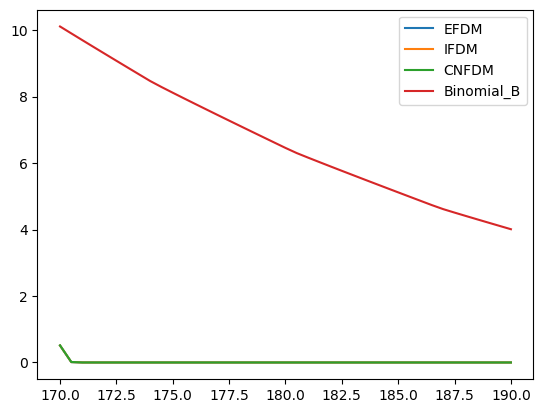

In [6]:
for method in method_list:
    plt.plot(result_i.columns,result_i.loc[method,:],label = method)
plt.plot(result_i.columns,result_i.loc['Binomial_B',:],label = 'Binomial_B')
plt.legend()

Trial 2: use the general approach mentioned in the lecture notes

In [33]:

def FDM_BS(r,sigma,S_min,S_max,dS,K,T,dt,method):
    # parameters
    # M is on x axis
    M = int(T/dt)+1

    # N is on y axis
    N = int((S_max-S_min)/dS)+1
    
    # create S_grid
    S_grid= np.arange(S_min,S_max+dS,dS)
    
    # set Alpha
    if method == "EFDM":
        alpha = 1
    elif method == "IFDM":
        alpha = 0
    else:
        alpha = 0.5
        
    # create a1-3,b1-3
    j_array = np.arange(0,M)
    a1_array = (sigma**2*np.power(j_array,2)-r*j_array)*(1-alpha)/2 
    a2_array = -1/dt-(sigma**2*np.power(j_array,2)+r)*(1-alpha)
    a3_array = (sigma**2*np.power(j_array,2)+r*j_array)*(1-alpha)/2    
    b1_array = (sigma**2*np.power(j_array,2)-r*j_array)*(alpha)/2  
    b2_array = 1/dt-(sigma**2*np.power(j_array,2)+r)*(alpha)
    b3_array = (sigma**2*np.power(j_array,2)+r*j_array)*(alpha)/2 
    
    # boundary condition
    P_grid = np.maximum(K-S_grid,0)
    # print(P_grid.shape)
    # update from back
    for i in range(M-1,-1,-1):

        
        a1 = a1_array[i]
        a2 = a2_array[i]
        a3 = a3_array[i]
        
        b1 = b1_array[i]
        b2 = b2_array[i]
        b3 = b3_array[i]
        
        # B
        B = np.zeros(N-2)

        for j in range(1,N-2):
            B[j] = -b3*P_grid[j+1]-b2*P_grid[j]-b1*P_grid[j-1]
        
        # A
        A = np.zeros((N-2,N-2))
        for i in range(N-2):
            if i > 0:
                A[i, i-1] = a3
            A[i, i] = a2
            if i < N-3:
                A[i, i+1] = a1
        
        
        # Solve for solution        
        F_1 = solve(A,B)
        
        EV = np.maximum(K-S_grid,0)[1:N-1]
        P_grid[1:N-1] = np.maximum(F_1,EV)
        
        # print(F_1)
        # update P_grid
        # P_grid[1:N-1] = F_1
        P_grid[N-1] = P_grid[N-2]
        P_grid[0] = P_grid[1]-(S_grid[0]-S_grid[1])
  
    return S_grid,P_grid


In [34]:
sigma = 0.25  
r = 0.055
K = 170   
S_max = 190   
S_min = 170   
T = 0.5     
dt = 0.05
dS = 0.5

method_list = ['EFDM','IFDM','CNFDM']



result_i = pd.DataFrame()
for method in method_list:
    S_grid,P_grid= FDM_BS(r,sigma,S_min,S_max,dS,K,T,dt,method)
    for i in range(len(S_grid)):
        col_label = np.round(S_grid[i],2)
        result_i.loc[method,col_label] = np.round(P_grid[i],4)
    
    # use binomial as benchmark
    col_list = result_i.columns
    for i in range(len(S_grid)):
        
        S_i = S_grid[i]
        P_benchmark = binomial_b(r,sigma,S_i,K,T,100)
        result_i.loc['Binomial_B',col_list[i]] = np.round(P_benchmark,4)
result_i

,170.0,170.5,171.0,171.5,172.0,172.5,173.0,173.5,174.0,174.5,...,185.5,186.0,186.5,187.0,187.5,188.0,188.5,189.0,189.5,190.0
EFDM,0.5000,0.0000,0.0000,0.0001,0.0018,0.0052,0.0103,0.0172,0.0260,0.0362,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Binomial_B,10.1084,9.9002,9.6928,9.4868,9.2816,9.0771,8.8732,8.6700,8.4672,8.2875,...,4.9889,4.8608,4.7328,4.6125,4.5089,4.4075,4.3069,4.2072,4.1079,4.0089
IFDM,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
CNFDM,0.5000,0.0000,0.0000,0.0000,0.0009,0.0025,0.0050,0.0084,0.0125,0.0173,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


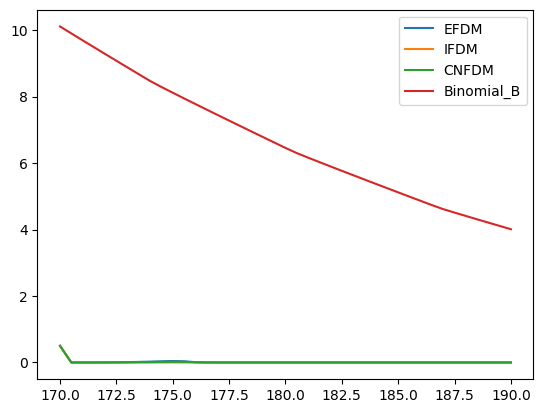

In [35]:
for method in method_list:
    plt.plot(result_i.columns,result_i.loc[method,:],label = method)
plt.plot(result_i.columns,result_i.loc['Binomial_B',:],label = 'Binomial_B')
plt.legend()

For some unknown reasons the FDM Method price is very close to 0 no matter how alpha changes. 

the general logic of the code should be correct. I suspect there is some unexpected behavior of certain part of code causes the weird result